### keras CNN으로 패션 아이템 구분하기

**1. 패키지 수입 및 파라미터 지정**

In [1]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D #풀링
from keras.layers import Conv2D, InputLayer #Conv2D=콘볼류션

In [2]:
# 파라미터
MY_EPOCH = 10
#MY_EPOCH = 0 #epoch 값을  바꾸는 문제
#MY_EPOCH = 20
#MY_EPOCH = 100
MY_BATCH = 250 #6만개의 이미지를 500개씩 가져온다
#MY_BATCH = 16 #학습시간이 늘어난다.

**2. 데이터 처리**

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터: ', X_train.shape) #3차원 데이터
print('학습용 출력 데이터: ', Y_train.shape)

print('평가용 입력 데이터: ', X_test.shape)
print('평가용 출력 데이터: ', Y_test.shape)


학습용 입력 데이터:  (60000, 28, 28)
학습용 출력 데이터:  (60000,)
평가용 입력 데이터:  (10000, 28, 28)
평가용 출력 데이터:  (10000,)


학습용 데이터 첫번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

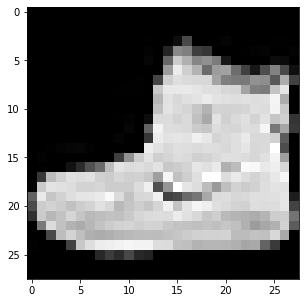

In [4]:
# 데이터 샘플 출력
print('학습용 데이터 첫번째 이미지 화소 정보')
print(X_train[0])
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
print('학습용 데이터 첫번째 이미지의 라벨: ', Y_train[0])


In [5]:
# 데이터 스케일링 (0에서 1사이의 정수로 바꿔주기)
X_train = X_train /255.0 
X_test = X_test /255.0

# 이미지 채널 정보 추가 (,1) reshape 함수
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train, 10)
print('학습용 데이터 첫번째 이미지의 라벨: ', Y_train[0])
Y_test = np_utils.to_categorical(Y_test, 10)

print('학습용 입력 데이터: ', X_train.shape)
print('학습용 출력 데이터: ', Y_train.shape)

print('평가용 입력 데이터: ', X_test.shape)
print('평가용 출력 데이터: ', Y_test.shape)

학습용 데이터 첫번째 이미지의 라벨:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터:  (60000, 28, 28, 1)
학습용 출력 데이터:  (60000, 10)
평가용 입력 데이터:  (10000, 28, 28, 1)
평가용 출력 데이터:  (10000, 10)


3. 인공 신경망 구현

In [7]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))

# 첫번째 합성곱 블럭
model.add(Conv2D(filters=32, 
                 kernel_size=2,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2)) #2는 2배로 줄고, 3은 3배로 줄음

# 두번째 합성곱 블럭
model.add(Conv2D(filters=64, 
                 kernel_size=2,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# DNN 입성
model.add(Flatten()) #DNN으로 입성할 때 Flatten으로 시작!

model.add(Dense(units=128,
                activation='relu')) 

model.add(Dense(units=10,
                activation='softmax')) #패션 아이템이 10개라서 뉴런 10개 설정

print('CNN 요약')
model.summary()

CNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)          

**4. 인공 신경망 학습**

In [8]:
# 학습 방식 설정
model.compile(optimizer='rmsprop', #sgd보다 adam이 정확도가 높게 나온다. sgd일 때, 정확도 0.78
              #loss='categorical_crossentropy', #crossentropy는 로그 취함
              loss= 'mse',
              metrics=['acc'])

# CNN 학습
print('학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1) #verbose =1 은 출력, 0은 출력안함

end = time()
print('학습 시간: {:.2f}'.format(end-begin))

학습 시작
Epoch 1/10
400/400 [==============================] - 5s 9ms/step - loss: 0.0365 - acc: 0.7282
Epoch 2/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0180 - acc: 0.8772
Epoch 3/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0149 - acc: 0.8986
Epoch 4/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0133 - acc: 0.9106
Epoch 5/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0121 - acc: 0.9191
Epoch 6/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0114 - acc: 0.9249
Epoch 7/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0107 - acc: 0.9279
Epoch 8/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0099 - acc: 0.9350
Epoch 9/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0089 - acc: 0.9415
Epoch 10/10
400/400 [==============================] - 4s 9ms/step - loss: 0.0084 - acc: 0.9461
학습 시간: 37.45


**5. CNN 평가**

In [9]:
# CNN 평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=1)

print('최종 손실값: {:.2f}'.format(score[0]))
print('최종 정확도: {:.2f}'.format(score[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.0127 - acc: 0.9144
최종 손실값: 0.01
최종 정확도: 0.91


**6. CNN 예측**

(28, 28, 1)
CNN 예측 값:  [[5.36499429e-05 1.70659700e-06 1.40047178e-01 1.02664679e-04
  8.56624961e-01 1.96540350e-06 3.15423799e-03 1.04940291e-07
  1.28936435e-05 6.83115161e-07]]
정답:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


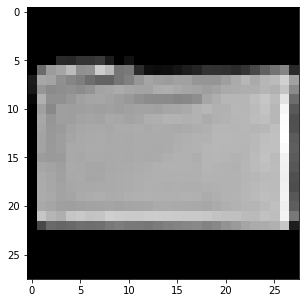

In [10]:
# 샘플 이미지 지정
image = X_test[1234]
print(image.shape)

# batch 정보 추가 (CNN에선 batch정보가 앞에 들어가야함 )
image = image.reshape(1, 28, 28, 1)
pred = model.predict(image)

# 정보 출력
print('CNN 예측 값: ', pred)
print('정답: ', Y_test[1234])



plt.figure(figsize=(5,5))
tmp = X_train[1234].reshape(28,28)
tmp = tmp * 255 #정규화한거 다시 돌려주기
plt.imshow(tmp, cmap='gray')
